In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,12

import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import numpy as np

In [2]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Потребление алкоголя в России ##

#### Пояснения к датасету ####

Expense	- доля расходов на алкоголь, % (выборочное исследование бюджетов домохозяйств)

Vodka - продажа водки и ликеро-водочных напитков, тыс. декалитров.

Cognac - продажа коньяка и коньячных напитков, тыс. декалитров.

Wine - продажа вина и винных напитков, тыс. декалитров (кроме игристых).

Sparkling - продажа игристых вин и шампанских, тыс. декалитров.

Beer - продажа пива и подобных напитков, тыс. декалитров.

All_cons - общая сумма алкоголя, тыс. декалитров.

Population - население региона, среднее за 2018 год.

Litres - литров на душу населения (продано).

Vodka_cons, Cognac_cons, Wine_cons, Sparkling_cons, Beer_cons - потребление литров на человека.

Vodka_prod, Cognac_prod, Wine_prod, Sparkling_prod - производство в регионе, тыс. декалитров.

Источник: Росстат. Регионы России. Социально-экономические показатели. 2019.
https://www.gks.ru/folder/210/document/13204

In [3]:
alko = pd.read_excel('alko.xlsx')

In [4]:
alko.head()

,Region,Expense,Vodka,Cognac,Wine,Sparkling,Beer,All_cons,Population,Litres,Vodka_cons,Cognac_cons,Wine_cons,Sparkling_cons,Beer_cons,Vodka_prod,Cognac_prod,Wine_prod,Sparkling_prod
0,Российская Федерация,1.6,83.3,11.5,95.4,16.9,732.7,939.8,146830576,64.0,5.7,0.8,6.5,1.2,49.9,78613.0,8354.0,70439.0,12443.0
1,Белгородская область,1.3,628.3,50.9,484.9,118.6,8475.5,9758.2,1548647,63.0,4.1,0.3,3.1,0.8,54.7,2212.0,0.0,0.0,0.0
2,Брянская область,1.5,625.0,62.3,906.0,99.0,5138.5,6830.8,1205584,56.7,5.2,0.5,7.5,0.8,42.6,742.0,0.0,0.0,0.0
3,Владимирская область,1.1,1056.1,120.1,1321.3,130.2,7705.1,10332.8,1372071,75.3,7.7,0.9,9.6,0.9,56.2,155.0,0.0,0.0,0.0
4,Воронежская область,1.1,1008.9,156.7,1490.1,242.3,10100.0,12998.0,2330795,55.8,4.3,0.7,6.4,1.0,43.3,83.7,0.0,0.0,0.0


In [5]:
# удаляем из датасета строку с показателями по РФ в целом
alko_rf = alko.head(1)
alko.drop([0], inplace=True)

In [6]:
# данных немного, можно перенести вручную
alko_rf

,Region,Expense,Vodka,Cognac,Wine,Sparkling,Beer,All_cons,Population,Litres,Vodka_cons,Cognac_cons,Wine_cons,Sparkling_cons,Beer_cons,Vodka_prod,Cognac_prod,Wine_prod,Sparkling_prod
0,Российская Федерация,1.6,83.3,11.5,95.4,16.9,732.7,939.8,146830576,64.0,5.7,0.8,6.5,1.2,49.9,78613.0,8354.0,70439.0,12443.0


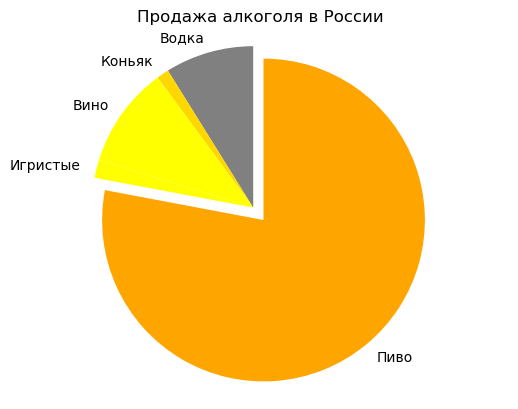

In [9]:
labels = 'Водка', 'Коньяк', 'Вино', 'Игристые', 'Пиво'
sizes = [alko_rf.Vodka, alko_rf.Cognac, alko_rf.Wine, alko_rf.Sparkling, 732.7]
explode = (0, 0, 0, 0, 0.1)
colors = ['gray', 'gold', 'yellow', 'yellow', 'orange',]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Продажа алкоголя в России')

plt.show()

Вполне ожидаемый результат, но зато редкий случай, когда круговая диаграмма уместна.

### Регионы, в которых тратят на алкоголь больше всего (топ-15) ###

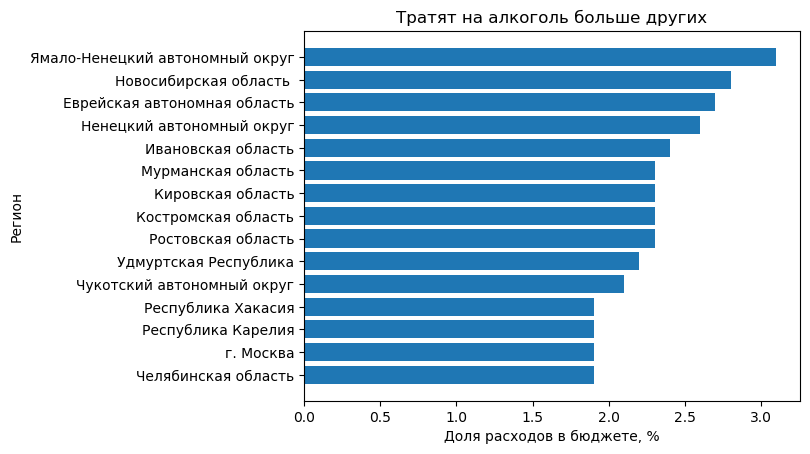

In [10]:
alko_sort = alko.sort_values('Expense', ascending=False).head(15)

plt.rcdefaults()
fig, ax = plt.subplots()

plt.barh(alko_sort['Region'], alko_sort['Expense'])
ax.invert_yaxis()
plt.xlabel('Доля расходов в бюджете, %')
plt.ylabel('Регион')
plt.title('Тратят на алкоголь больше других')

top_expense = alko_sort.head(15)

### Потребление на душу населения (топ-15) ###

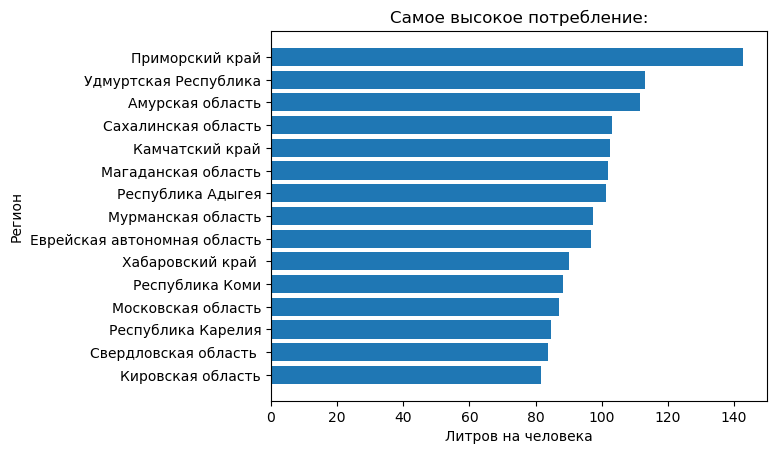

In [11]:
alko_sort = alko.sort_values('Litres', ascending=False).head(15)

plt.rcdefaults()
fig, ax = plt.subplots()

plt.barh(alko_sort['Region'], alko_sort['Litres'])
ax.invert_yaxis()
plt.xlabel('Литров на человека')
plt.ylabel('Регион')
plt.title('Самое высокое потребление:')

top_conse = alko_sort.head(15)

Выделяем регионы, которые и тратят больше, и больше потребляют.

Text(0.5, 1.0, 'Тратят больше и одновременно покупают больше других:')

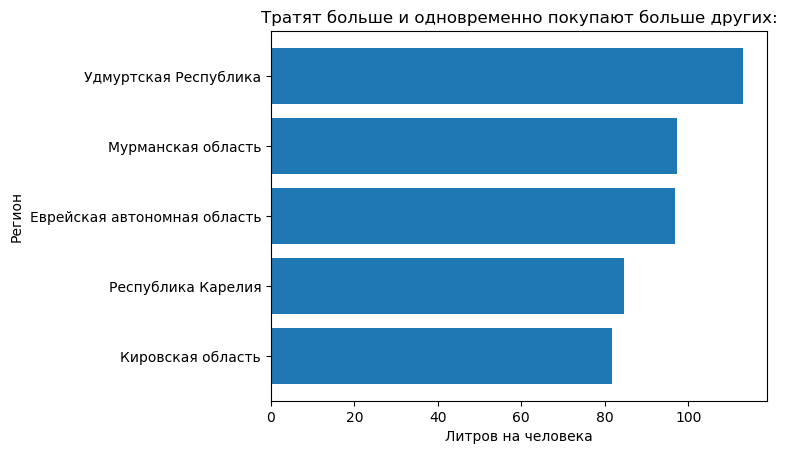

In [12]:
# Здесь должен быть stacked bar, но пока не до конца разобрался
alko_top = top_conse.merge(top_expense, how='inner')

plt.rcdefaults()
fig, ax = plt.subplots()

plt.barh(alko_top['Region'], alko_top['Litres'])
ax.invert_yaxis()
plt.xlabel('Литров на человека')
plt.ylabel('Регион')
plt.title('Тратят больше и одновременно покупают больше других:')

### Коррелируют ли траты и потребление? ###

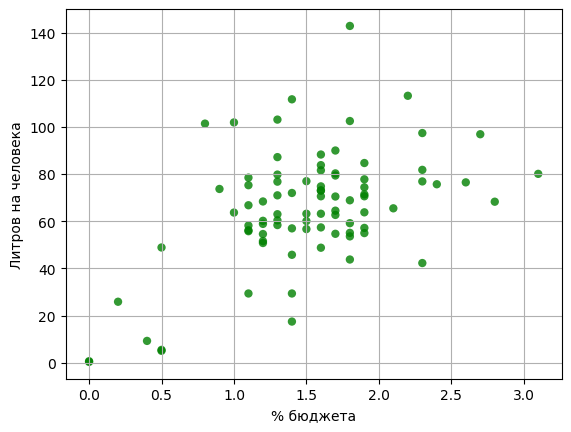

In [13]:
expense = alko['Expense']
litres = alko['Litres']

fig, ax = plt.subplots()
ax.scatter(expense, litres, c='green', alpha=0.8, edgecolors='none')

ax.grid(True)
plt.xlabel('% бюджета')
plt.ylabel('Литров на человека')
plt.show()

Корреляция есть, но самая очевидная.

Корреляция заметнее, если сравнить удельный вес алкоголя в бюджете и потребление алкоголя по видам, хотя заметнее и выбросы.

Выбросы? возможно объясняются северокавказскими регионами, которые официально стараются не пить.

Характернее, чтобы сильнее всего выбивается водка.

Сами же спиртные напитки ожидаемо коррелирует между собой, водка с пивом, шампанское с вином и коньяком.


## Корреляция удельного веса алкобюджета и потребления ##

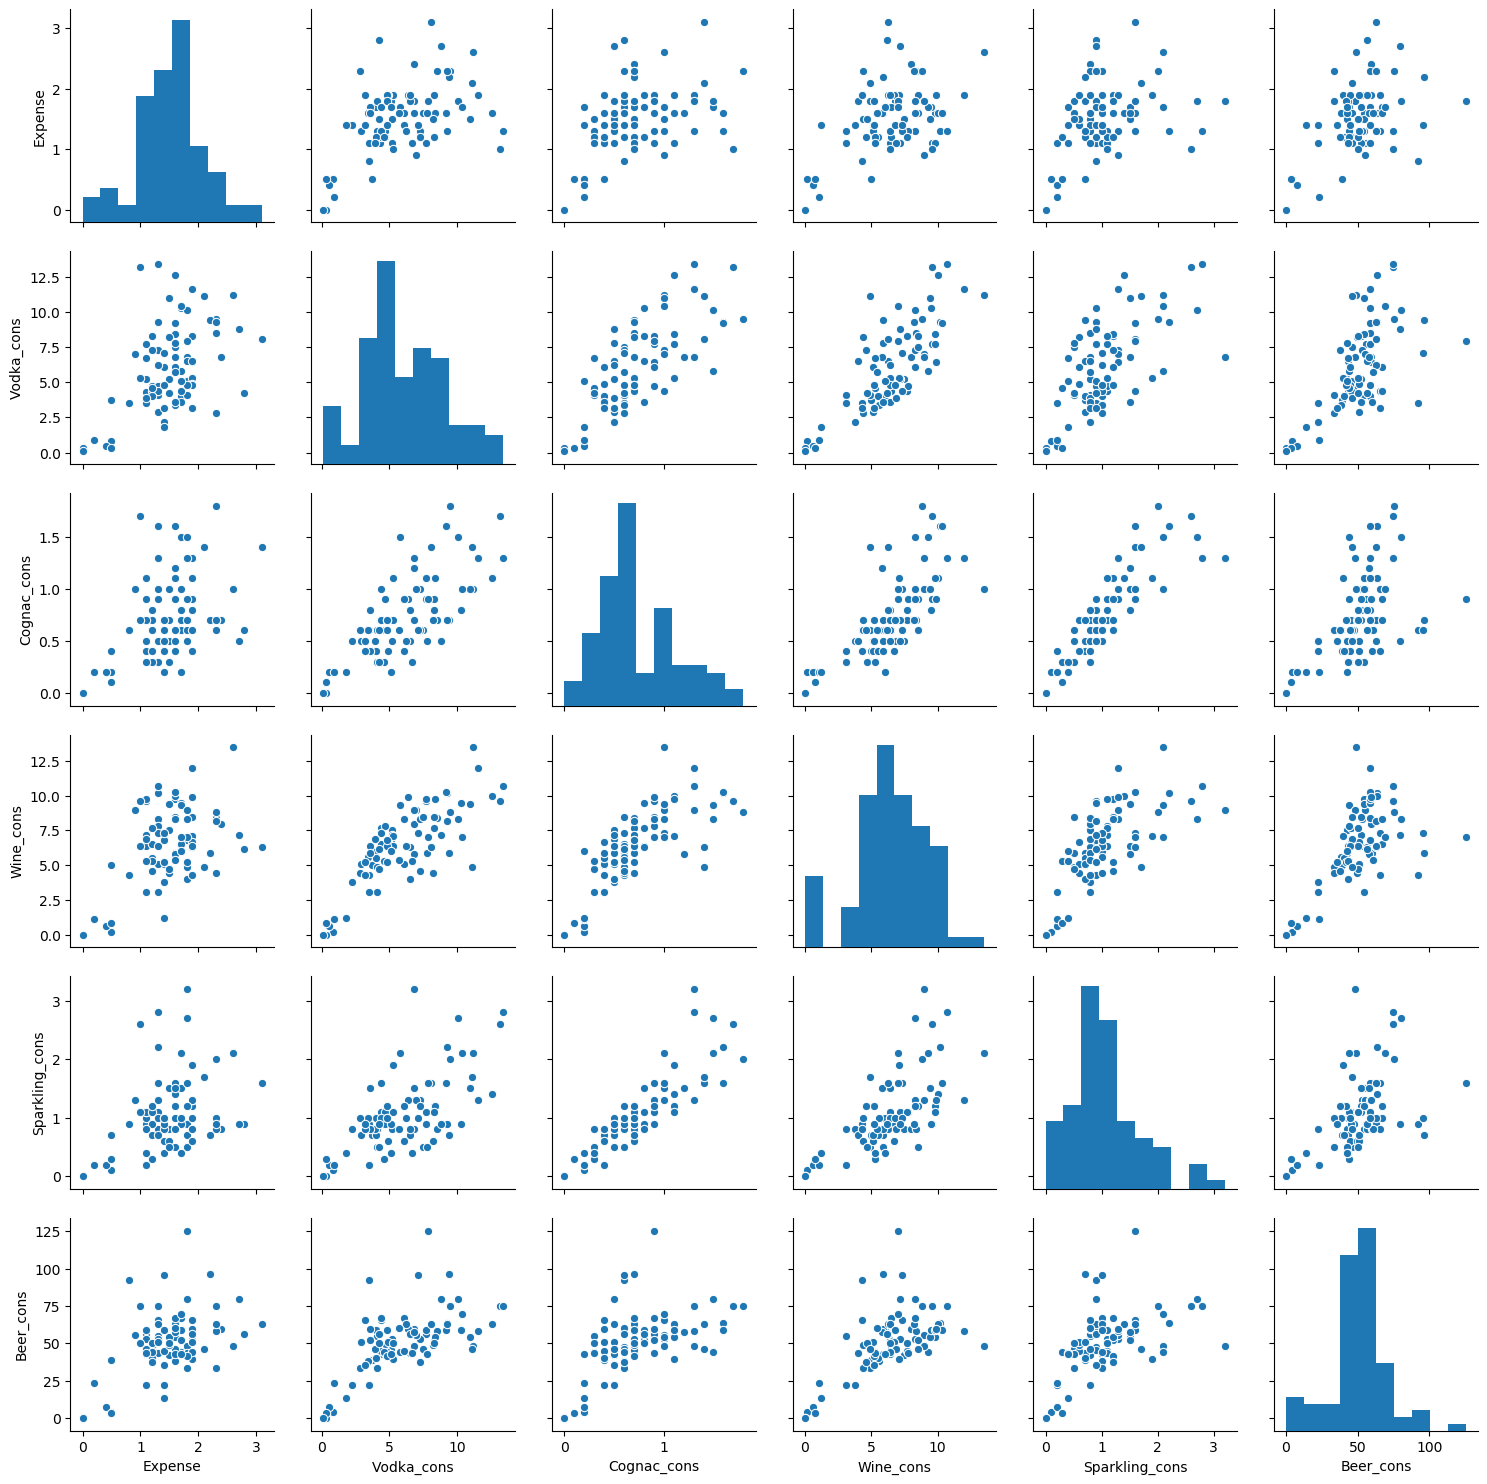

In [15]:
sns_plot = sns.pairplot(
    alko[['Expense', 'Vodka_cons', 'Cognac_cons', 'Wine_cons', 'Sparkling_cons', 'Beer_cons']])
sns_plot

### Производство и потребления вина ###

Сначала сравним производство и потребление.

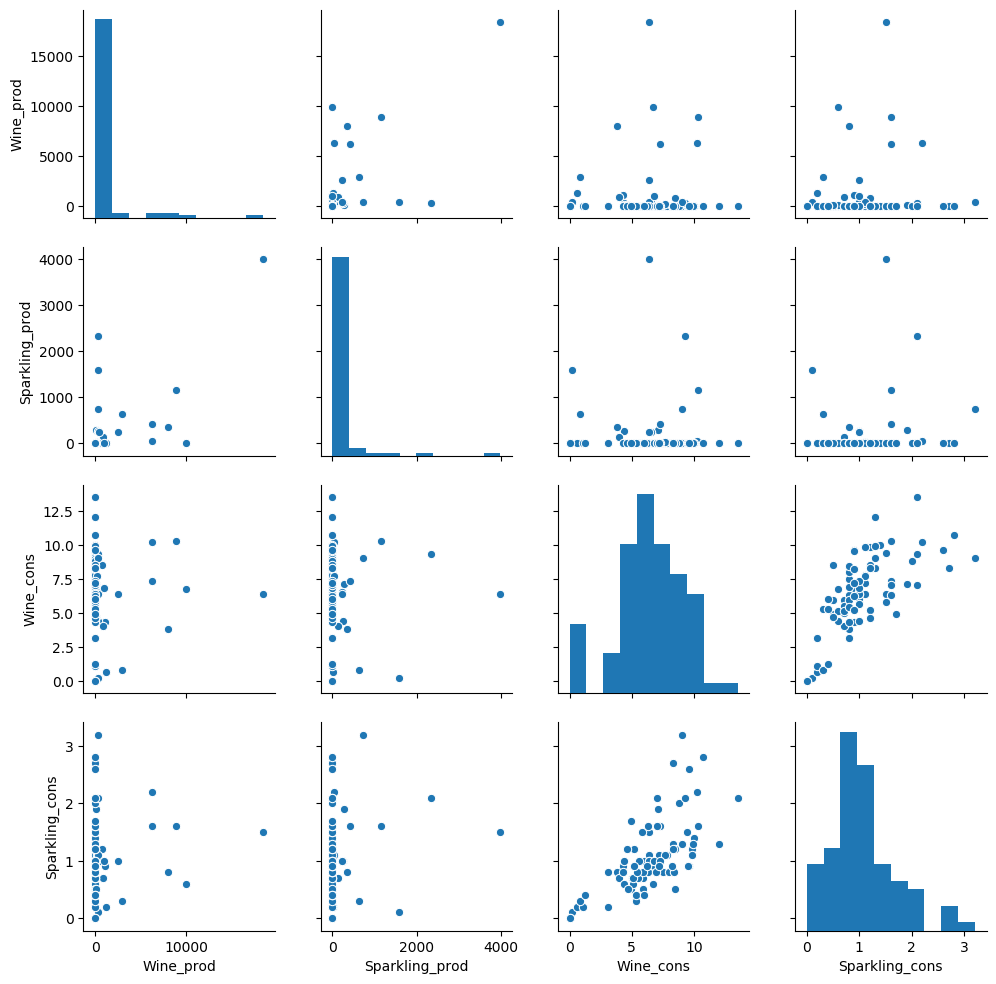

In [16]:
sns_plot = sns.pairplot(
    alko[['Wine_prod', 'Sparkling_prod', 'Wine_cons', 'Sparkling_cons']])
sns_plot

Сразу заметна странная взаимосвязь между производством и потреблением.

Можно предположить, что из-за климата несколько регионов работают на всю страну.

При детальном рассмотрении обнаруживается много интересного. В топ-10 виноделов попала даже Челябинская область.

## Топ-10 регионов виноделов и их потребление ##

Сравнивались величины Производства вина в регионе и Потребление (общее). 

In [17]:
alko_wine_prod = alko.sort_values('Wine_prod', ascending=False).head(10)


trace0 = go.Bar(
    x=alko_wine_prod.Region,
    y=alko_wine_prod.Wine_prod,
    name='Производство вина',
    orientation = 'v'
)

trace1 = go.Bar(
    x=alko_wine_prod.Region,
    y=alko_wine_prod.Wine,
    name='Потребление',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

## Топ-10 регионов-любителей вина и виноделие в этих регионах ##

Топ-10 - по потреблению вина на душу населения, на графике отображено, естественно, общее потребление (показатель - Wine).
(Топ по потреблению ниже.)

In [18]:
alko_wine_cons = alko.sort_values('Wine_cons', ascending=False).head(10)

In [19]:
trace0 = go.Bar(
    x=alko_wine_cons.Region,
    y=alko_wine_cons.Wine_prod,
    name='Производство вина',
    orientation = 'v'
)

trace1 = go.Bar(
    x=alko_wine_cons.Region,
    y=alko_wine_cons.Wine,
    name='Потребление',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

## Топ-10 регионов-потребителей вина и виноделие ##

In [20]:
alko_wine_cons2 = alko.sort_values('Wine', ascending=False).head(10)

In [21]:
trace0 = go.Bar(
    x=alko_wine_cons2.Region,
    y=alko_wine_cons2.Wine_prod,
    name='Производство вина',
    orientation = 'v'
)

trace1 = go.Bar(
    x=alko_wine_cons2.Region,
    y=alko_wine_cons2.Wine,
    name='Потребление',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)